<a href="https://www.kaggle.com/code/aayushsin7a/ev-market-size-analysis?scriptVersionId=172294418" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

> # Introduction
- Electric vehicles (EVs) represent a significant shift in the automotive industry, driven by the need for sustainable transportation solutions.
- Market Size Analysis is the process of estimating the potential sales for a product or service within a particular market segment.
- In the context of electric vehicles (EVs), it involves assessing the total volume of EV registrations to understand the growth of the market, forecast future trends, and help stakeholders make informed decisions regarding production, infrastructure development, and policy-making
- This project aims to analyze the EV market's size, exploring various factors that influence its growth and potential.

> # Goal 
The main goal of this study is to use past data on electric vehicle (EV) registrations to figure out how common EVs are now, predict how much they will grow in the market, and spot the main trends and driving forces behind this growth. The specific objectives are to:
- Look at the past increase in EV registrations.
- Predict the number of future EV registrations using past patterns.
- Examine how EV registrations vary by model, brand, and location.
- Calculate the expected size and expansion potential of the EV market in the coming years.
- Offer valuable insights to help those involved in making decisions about manufacturing, planning for EV charging infrastructure, and creating policies.

The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States:

- VIN (1-10): Partial Vehicle Identification Number.
- County: The county in which the vehicle is registered.
- City: The city in which the vehicle is registered.
- State: The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.
- Postal Code: The postal code where the vehicle is registered.
- Model Year: The year of the vehicle model.
- Make: The manufacturer of the vehicle.
- Model: The model of the vehicle.
- Electric Vehicle Type: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
- Clean Alternative Fuel Vehicle (CAFV) Eligibility: Eligibility status for clean alternative fuel vehicle programs.
- Electric Range: The maximum range of the vehicle on a single charge (in miles).
- Base MSRP: The Manufacturer’s Suggested Retail Price.
- Legislative District: The legislative district where the vehicle is registered.
- DOL Vehicle ID: Department of Licensing Vehicle Identification.
- Vehicle Location: Geographic coordinates of the vehicle location.
- Electric Utility: The electric utility service provider for the vehicle’s location.
- 2020 Census Tract: The census tract for the vehicle’s location.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print("All Libraries loaded successfully!!")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-population-data/Electric_Vehicle_Population_Data.csv
All Libraries loaded successfully!!


In [2]:
# Read the dataset 
df = pd.read_csv("/kaggle/input/electric-vehicle-population-data/Electric_Vehicle_Population_Data.csv")

# EDA

In [3]:
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135030 non-null  object 
 2   City                                               135030 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

In [5]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

In [6]:
# Drop Missing values
df.dropna(inplace=True)

In [7]:
# Lets clean some of the data 
def clean_my_dataframe(df):
    df.rename(columns={'VIN (1-10)':'VIN','County':'Country','Postal Code':'PostalCode','Model Year':'Model_Year','Electric Vehicle Type':'EV_type','Clean Alternative Fuel Vehicle (CAFV) Eligibility':'Clean_alternative_fuel_vehicle','Electric Range':'ElectricRange','Base MSRP':'MSRP'
                     ,'Legislative District':'District','DOL Vehicle ID':'Lisence','Vehicle Location':'VehicleLocation','Electric Utility':'ElectricUtility','2020 Census Tract':'Census Tract'},inplace=True)
    df['PostalCode'] = df['PostalCode'].astype('int').astype('str')
    df['District'] =  df['District'].astype('int')
    return df 
    
    

In [8]:
EVframe = clean_my_dataframe(df)

In [9]:
EVframe.head(5)

,VIN,Country,City,State,PostalCode,Model_Year,Make,Model,EV_type,Clean_alternative_fuel_vehicle,ElectricRange,MSRP,District,Lisence,VehicleLocation,ElectricUtility,Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


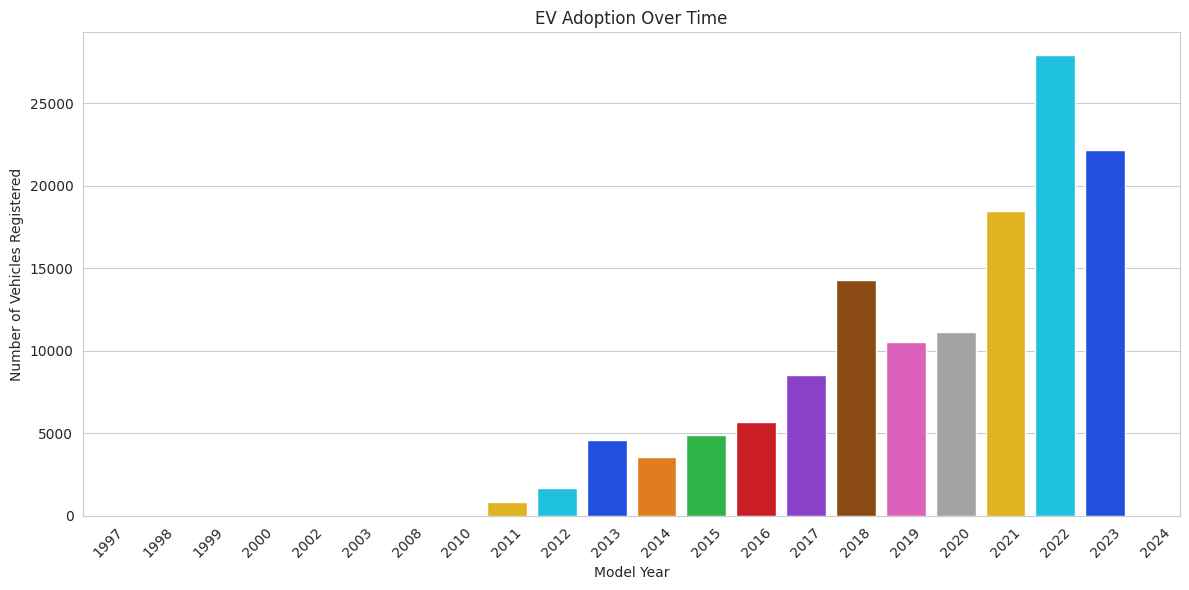

In [10]:
# visualizing ev adoption over time
plt.figure(figsize = (12,6))
EVframe_by_year = EVframe['Model_Year'].value_counts().sort_index()
sns.barplot(x = EVframe_by_year.index, y = EVframe_by_year.values, palette = 'bright')
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

- There is a sharp increase in the number of EVs registered starting around 2010. 

# Geographical Distributions

In [11]:
Conties = EVframe['Country'].value_counts()

In [12]:
top_counties = Conties.head(5).index
top_counties

Index(['King', 'Snohomish', 'Pierce', 'Clark', 'Thurston'], dtype='object', name='Country')

In [13]:

# filtering the dataset for these top counties
top_counties_data = EVframe[EVframe['Country'].isin(top_counties)]
top_counties_data.head()

,VIN,Country,City,State,PostalCode,Model_Year,Make,Model,EV_type,Clean_alternative_fuel_vehicle,ElectricRange,MSRP,District,Lisence,VehicleLocation,ElectricUtility,Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
6,5YJ3E1EC1L,Snohomish,Marysville,WA,98271,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308.0,0.0,38,110992472,POINT (-122.17138469999998 48.10433000000006),PUGET SOUND ENERGY INC,5.306105e+10


In [14]:

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['Country', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
ev_city_distribution_top_counties

,Country,City,Number of Vehicles
0,King,Seattle,23408
1,King,Bellevue,6944
2,King,Redmond,4958
3,Clark,Vancouver,4815
4,King,Kirkland,4196
...,...,...,...
124,Pierce,South Prairie,1
125,Thurston,Bucoda,1
126,Pierce,Artondale,1
127,Clark,Orchards,1


In [15]:
# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

In [16]:
top_cities.head(10)

,Country,City,Number of Vehicles
0,King,Seattle,23408
1,King,Bellevue,6944
2,King,Redmond,4958
3,Clark,Vancouver,4815
4,King,Kirkland,4196
5,King,Sammamish,3945
6,King,Renton,3511
7,Snohomish,Bothell,3297
8,Thurston,Olympia,3224
9,Pierce,Tacoma,2842


In [17]:
'''


plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

'''

'\n\n\nplt.figure(figsize=(12, 8))\nsns.barplot(x=\'Number of Vehicles\', y=\'City\', hue=\'County\', data=top_cities, palette="magma")\nplt.title(\'Top Cities in Top Counties by EV Registrations\')\nplt.xlabel(\'Number of Vehicles Registered\')\nplt.ylabel(\'City\')\nplt.legend(title=\'County\')\nplt.tight_layout()\nplt.show()\n\n'